WHAT IS SLEEP DISORDER?

- SLEEP DISORDER is a condition that makes it hard for a person to sleep properly.
- Insomnia : Trouble falling or staying asleep.
- Sleep Apnea :  Due to airway blockage person's breathing stops and starts repeatedly during sleep.
- Narcolepsy : Sudden sleep attacks during the day.


Dataset Columns:

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic 
pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Sleep_disorder_data.csv")

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df["BMI Category"] = df["BMI Category"].replace({
    "Normal Weight": "Normal"
})

In [6]:
df.drop('Person ID' , axis=1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


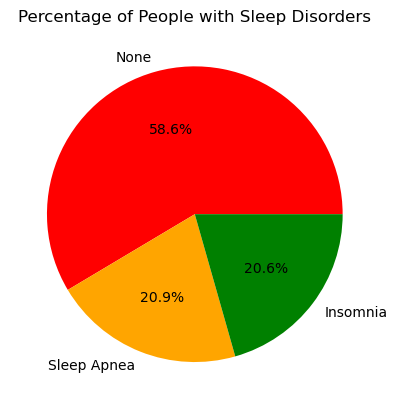

In [7]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%.1f%%', colors=['red', 'orange', 'green'])
plt.title('Percentage of People with Sleep Disorders')
plt.show()


INFERENCE:
- Around 40% of the people are suffering from the disorder
- 60% of the people are not having sleep issues

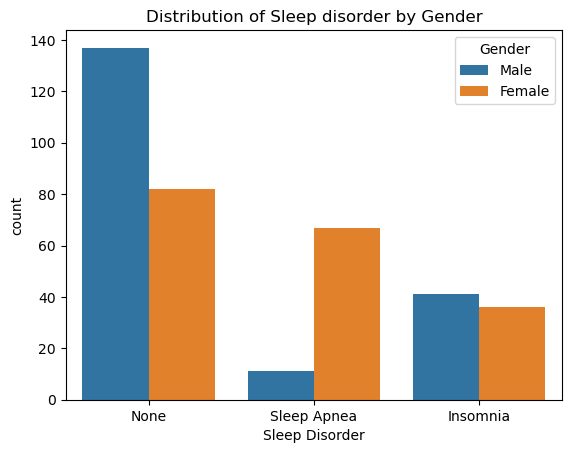

In [27]:
sns.countplot(data=df , x='Sleep Disorder' , hue='Gender')
plt.title('Distribution of Sleep disorder by Gender')
plt.show()

INFERENCE:
- Males in comparison with females  have no sleep disorder
- Sleep Apnea is found more in females
- Insomnia affects both male and female

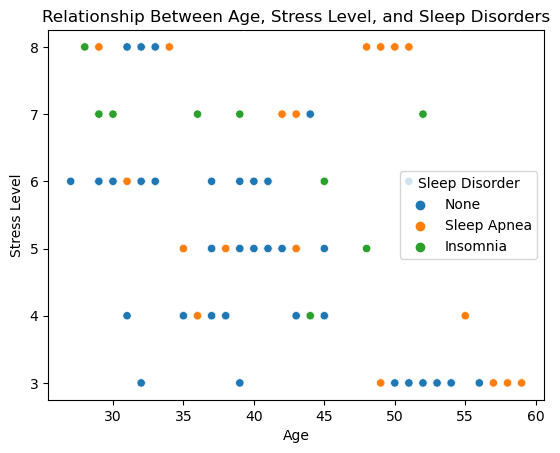

In [8]:
sns.scatterplot(x=df['Age'], y=df['Stress Level'], hue=df['Sleep Disorder'])
plt.title("Relationship Between Age, Stress Level, and Sleep Disorders")
plt.show()

INFERENCE:
- People with stress level above 6 have Insomnia and Sleep Apnea
- People with stress level less than 4 have no disorder
- Insomnia is spread across all ages 
- Sleep Apnea is found  for age higher than 40

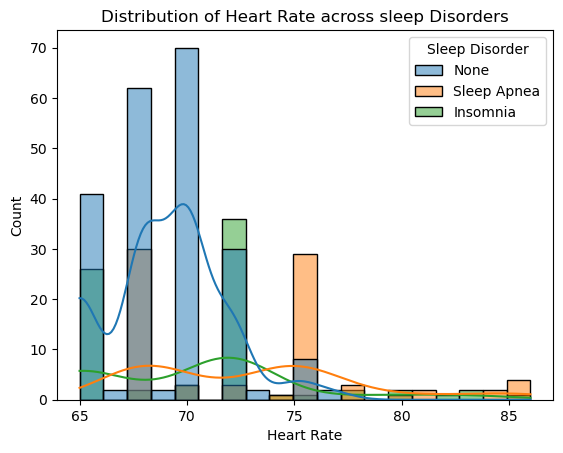

In [29]:
sns.histplot(data=df, x="Heart Rate", hue="Sleep Disorder", kde=True)
plt.title("Distribution of Heart Rate across sleep Disorders")
plt.show()


INFERENCE:
- People with no disorder have lower heart rates
- Sleep Apnea have the highest heart rates
- Insomnia shows some variation around 65-75 range

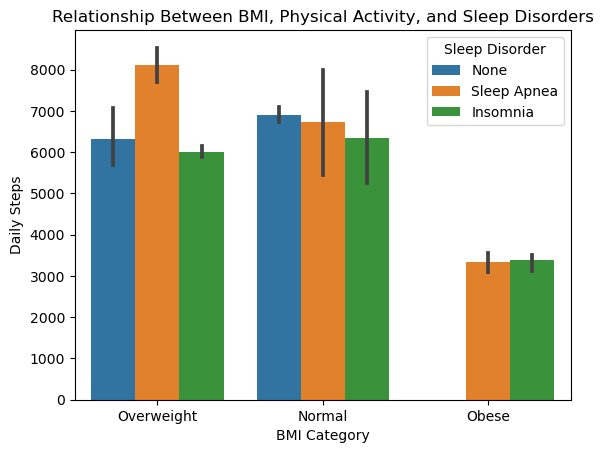

In [19]:
sns.barplot(data=df, y='Daily Steps',x='BMI Category', hue='Sleep Disorder')
plt.title("Relationship Between BMI, Physical Activity, and Sleep Disorders")
plt.show()

INFERENCE:

Overweight BMI Category:
- People with sleep apnea have the highest daily steps among overweight individuals.

Obese BMI Category:
- Obese individuals have the lowest daily steps across all BMI categories.

Normal BMI Category:
- Individuals with no sleep disorder tend to have the highest daily steps

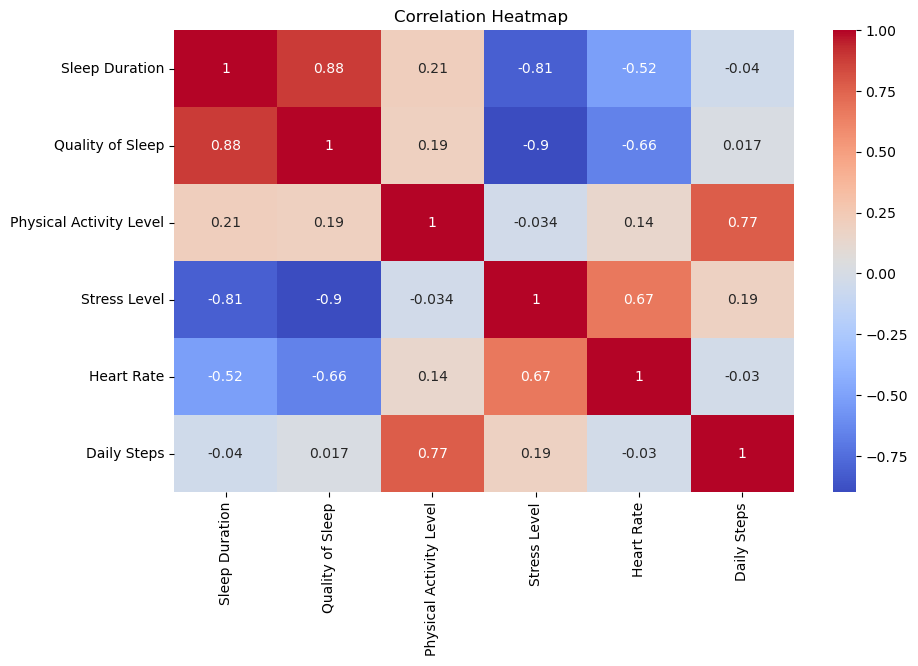

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()


INFERENCE:
- Sleep Duration & Quality of Sleep are positively correlated ensuring more sleep durationis strongly associated with better sleep quality
- Daily Steps & Physical Activity Level :Higher daily steps indicate a more active lifestyle.
- Stress Level & Heart Rate : Higher stress levels are linked to increased heart rate.

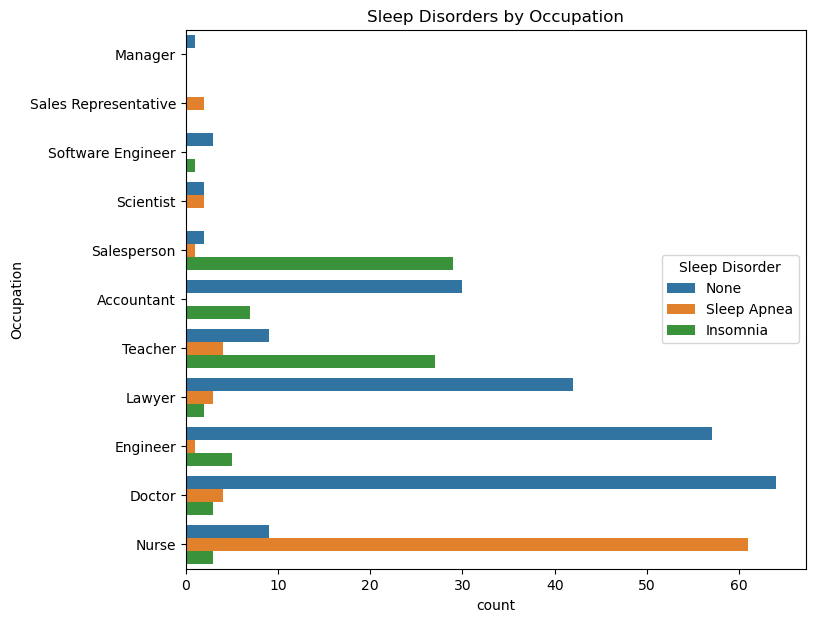

In [38]:
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']
sorted_occupations = occupation_counts.sort_values(by='Count', ascending=True)['Occupation']
plt.figure(figsize=(8, 7))
sns.countplot(data=df, y='Occupation', hue='Sleep Disorder', order=sorted_occupations)
plt.title("Sleep Disorders by Occupation")
plt.show()

INFERENCE:
- Nurses have the highest count of individuals experiencing Sleep Apnea and Insomnia. 
- Teachers and Salespersons show high count of Insomnia, which could be linked to stress from workload and job pressure.

In [83]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [82]:
df[['Systolic', 'Diastolic']]=df['Blood Pressure'].str.split('/',expand=True).astype(int)

In [84]:
def categorize_bp(sys):
    if sys < 130:
        return "Normal"
    elif 130 <= sys < 140:
        return "At Risk"
    else:
        return "High Risk (OSA)"

In [85]:
Sys_categorize=[categorize_bp(sys) for sys in df['Systolic']]

In [88]:
df['Sys Category'] = Sys_categorize

In [90]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Sys Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High Risk (OSA)
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,High Risk (OSA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High Risk (OSA)
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High Risk (OSA)
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High Risk (OSA)
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,High Risk (OSA)


<AxesSubplot:xlabel='Sys Category', ylabel='count'>

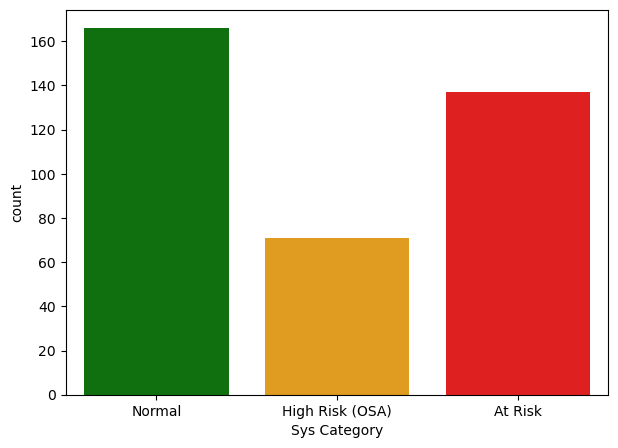

In [91]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['Sys Category'], palette=['green', 'orange', 'red'])

In [21]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')